PBTI Data Training
Param: vgs, vds, Lg, temp, Ts


Data Modeling

Id0_test: [[-1.00000000e+00 -8.71428570e-01 -7.42857140e-01 -6.14285710e-01
  -4.85714290e-01 -3.57142860e-01 -2.28571430e-01 -1.00000000e-01
   2.85714290e-02  1.57142860e-01  2.85714290e-01  4.14285710e-01
   5.42857140e-01  6.71428570e-01  8.00000000e-01  9.28571430e-01
   1.05714290e+00  1.18571430e+00  1.31428570e+00  1.44285710e+00
   1.57142860e+00  1.70000000e+00  1.82857140e+00  1.95714290e+00
   2.08571430e+00  2.21428570e+00  2.34285710e+00  2.47142860e+00
   2.60000000e+00  2.72857140e+00  2.85714290e+00  2.98571430e+00
   3.11428570e+00  3.24285710e+00  3.37142860e+00  3.50000000e+00]
 [-1.00500000e+00 -8.76428570e-01 -7.47857140e-01 -6.19285710e-01
  -4.90714290e-01 -3.62142860e-01 -2.33571430e-01 -1.05000000e-01
   2.35714290e-02  1.52142860e-01  2.80714290e-01  4.09285710e-01
   5.37857140e-01  6.66428570e-01  7.95000000e-01  9.23571430e-01
   1.05214290e+00  1.18071430e+00  1.30928570e+00  1.43785710e+00
   1.56642860e+00  1.69500000e+00  1.82357140e+00  1.95214290e+00

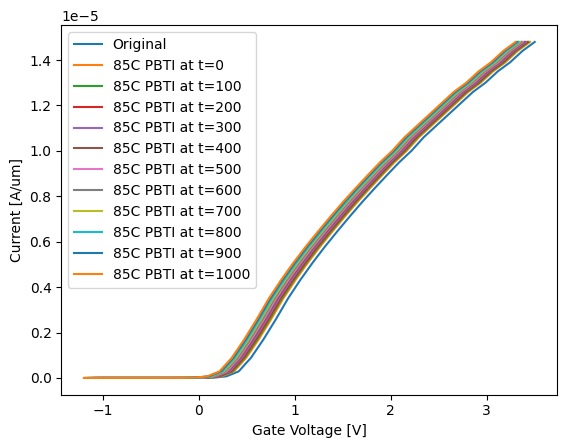

In [ ]:
Vg_test = np.array(idvg_temp.iloc[:, 0])
t = np.arange(0, 1001, 100)  # Time from 0 to 1000 by intervals of 100s
delta_Vg_25 = -0.05 / 1000 * t  # Calculate the change in Vg for each time step
delta_Vg_85 = -0.15 / 1000 * t - 0.05
# Subtract delta_Vg from Vg_test for each time step
Vg_modified_25 = np.array([Vg_test + delta for delta in delta_Vg_25])
Vg_modified_85 = np.array([Vg_test + delta for delta in delta_Vg_85])
Vg_modified_vstack = np.vstack((Vg_modified_25, Vg_modified_85))
Id0_test = np.array(idvg_temp.iloc[:, 243])
print("Id0_test: {}".format(Vg_modified_vstack))
plt.plot(Vg_test, (Id0_test), label = "Original") ## TCAD
for i in range(11):
    plt.plot(Vg_modified_85[i][:], Id0_test, label = "85C PBTI at t={}".format(i*100)) ## TCAD
    #plt.plot(Vg_modified_85[i][:], Id85_test, label = "85C PBTI") ## TCAD
#plt.scatter(Vg_test, np.log10(Id2_test), label = "VD = 2.4V") ## TCAD
#plt.plot(vd_temp, np.log10(Id0_test), label = "VD = 0.05V")
#plt.plot(vd_temp, np.log10(Id_test), label = "VD = 1V")
#plt.plot(vd_temp, np.log10(Id2_test), label = "VD = 2.4V")
plt.xlabel("Gate Voltage [V]")
plt.ylabel("Current [A/um]")
plt.legend()
plt.show()


190080
36
30
8
[1.5500000000000013e-06, 1.8499999999999997e-06, 2.300000000000001e-06, 2.7399999999999996e-06, 3.3300000000000024e-06, 4.049999999999998e-06, 5.029999999999999e-06, 5.990000000000001e-06, 7.179999999999997e-06, 8.699999999999995e-06, 1.0299999999999996e-05, 1.2200000000000005e-05, 1.439999999999999e-05, 1.6900000000000014e-05, 1.9700000000000018e-05, 2.290000000000002e-05, 2.6600000000000003e-05, 3.09e-05, 3.5800000000000016e-05, 4.119999999999999e-05, 4.669999999999996e-05, 5.1599999999999994e-05, 5.5399999999999964e-05, 5.7800000000000056e-05, 5.859999999999996e-05, 5.890000000000004e-05, 5.909999999999996e-05, 5.920000000000003e-05, 5.929999999999994e-05, 5.94e-05]
[0.05  0.055 0.06  0.065 0.07  0.075 0.08  0.09 ]

0.0038954139999999985
0.0031520120000000005
[0, 1, 2, 3, 4, 5, 6, 7]
[-3.523126363712982, -3.5313248566887667, -3.5406557698642316, -3.548983085172863, -3.563220552124297, -3.5655013551678154, -3.57969761482131, -3.5996727333989957]
[[1.         0.97434407

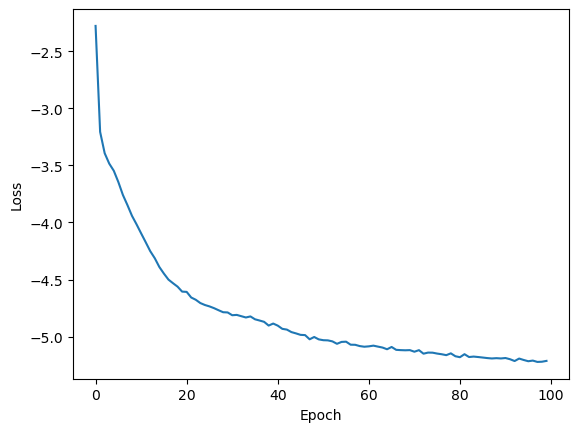


module IWO_verilogA (d, g, s);
inout d, g, s;
electrical d, g, s;

//****** Parameters L and W ********
parameter real W = 0.1; //set on cadence
parameter real L = 0.05; //set on cadence
parameter MinVg = -1.0 ;
parameter normVg = 0.2222222222222222 ;
parameter MinVd = 0.01 ;
parameter normVd = 0.2949852507374631 ;
parameter MinLg = 0.05 ;
parameter normLg = 25.000000000000004 ;
parameter MinI = -23.987162775294827 ;
parameter normI = 0.04615723364307646;
parameter Mintemp = 25.0;
parameter normtemp = 0.016666666666666666;
parameter Mints = 0;
parameter normts = 0.001;

real Vg, Vd, Vs, Vgs, Vds, Lg, Id, Cgg, Cgsd, Vgd;
real Vgsraw, Vgdraw, dir;
real ts, temp;
// stress time, temperature
// ts = 0 to 1000, temp = 25C or 85C

analog begin
	Vg = V(g);
	Vs = V(s);
	Vd = V(d);
    Vgsraw = Vg-Vs ;
    Vgdraw = Vg-Vd ;
if (Vgsraw>=Vgdraw) begin
	Vgs = ((Vg-Vs) - MinVg) * normVg ;
    dir = 1 ;
end
else begin
	Vgs = ((Vg-Vd) - MinVg) * normVg ;
    dir = -1 ;
end
	Vds = (abs(Vd-Vs) - MinVd)

In [9]:
from re import L
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

from torch import optim
from torch.utils import data
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader
from torch.cuda.amp import GradScaler, autocast
import matplotlib.pyplot as plt

import statistics
import datetime
import os
import csv
import math
import time
import numpy as np
import os

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Record the start time
start_time = time.time()

os.getcwd()

start = time.time()

idvg_temp = pd.read_csv(r'./csvData/PBTI_Variation.csv', encoding='utf8')

lch = [0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.09]
vd_temp=[0.01, 0.012, 0.015, 0.018, 0.022, 0.027, 0.034, 0.041, 0.050, 0.062, 0.075, 0.092, 0.113, 0.138, 0.169, 0.207, 0.253, 0.310, 0.379, 0.464, 0.568, 0.695, 0.851, 1.042, 1.275, 1.560, 1.9600, 2.337, 2.86, 3.4]
temperature = np.array([25.0, 85.0])
stress_time = np.arange(0, 1001, 100)
vd = np.array(vd_temp)
vg_temp=idvg_temp.iloc[:,0]
vg = np.array(vg_temp.values)
lch = np.array(lch)


def Logset(target):
    temp = np.array(target)
    # temp[temp<0]=abs(temp)
    # temp = temp.tolist() not use
    temp = np.log10(temp)
    return temp

It = []
for t in list(range(len(temperature))):
    for s in list(range(len(stress_time))):
        for l in list(range(len(lch))):
            for i in list(range(len(vd))):
                col_index = 2*i + 1 + 2*len(vd)*l + 2*len(vd)*len(lch)*s + 2*len(vd)*len(lch)*len(stress_time)*t
                temp = idvg_temp.iloc[:, col_index]
                temp = np.array(temp.values)
                It.extend(temp)

It = Logset(It)
# vd = Logset(vd)

def normaliz(target):
    Min = min(target)
    Val = target - Min
    Max = max(Val)
    if Max == 0:
        Norm = 1
    else:
        Norm = 1 / Max
    return (Norm, Val, Min)

(normVg, Vg_1, MinVg)=normaliz(vg)
(normVd, Vd_1, MinVd)=normaliz(vd)
(normIt, It_1, MinIt)=normaliz(It)
(normLch, Lch_1, MinLch) = normaliz(lch)
(normtemperature, temperature_1, Mintemperature) = normaliz(temperature)
(normstress_time, stress_time_1, Minstress_time) = normaliz(stress_time)

Vg = normVg*Vg_1
Vd = normVd*Vd_1
I = normIt*It_1
Lch = normLch*Lch_1
temperature = normtemperature*temperature_1
stress_time = normstress_time*stress_time_1

datasets = []
for t in list(range(len(temperature))):
    for s in list(range(len(stress_time))):
        for l in list(range(len(Lch))):
            for i in list(range(len(vd))):
                for j in list(range(len(vg))):
                    index = j + len(vg) * (i + len(vd) * (l + len(Lch) * (s + len(stress_time) * t)))
                    temp = [vg[j], vd[i], Lch[l], temperature[t], stress_time[s], I[index]]
                    datasets.append(temp)

V = []
for i in list(range(len(datasets))):
    temp = [datasets[i][0], datasets[i][1], datasets[i][2], datasets[i][3], datasets[i][4]]
    V.append(temp)

I = []
for i in list(range(len(datasets))):
    temp = [datasets[i][5]]
    I.append(temp)

V = torch.tensor(V)
I = torch.tensor(I)

# dataset = list(zip(V, I))
x_train, x_test, y_train, y_test = train_test_split(V, I, test_size=0.1, random_state=41)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size = 64, num_workers = 20, shuffle=True)
#dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=23, pin_memory=True)
testdataloader = DataLoader(TensorDataset(x_test, y_test))

# print(idvg_temp.values)
It_g = [10**x for x in It]
CM_git = np.corrcoef(vg,It_g[len(vg)*10:len(vg)*11])
Itd=[]
print(len(It_g))
print(len(vg))
print(len(vd))
print(len(lch))

for i in list(range(len(vd))):
    Itd.append(It_g[len(vg)-23+len(vg)*i])
print(Itd)
CM_dit = np.corrcoef(vd, Itd)

print(lch)
print()
Itl = []
print(It_g[len(vg)*len(vd)-4])
print(It_g[len(vg)*len(vd)*8-4])
print(list(range(len(lch))))
for i in list(range(len(lch))):
    Itl.append(It[len(vg)*len(vd)*(i+1)-20] )
print(Itl)
CM_lit = np.corrcoef(Lch, Itl)

print(CM_git)
print(CM_dit)
print(CM_lit)

n1 = 40 #40
n2 = 20 #20

# Define the neural network class
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(5, n1)
        self.fc2 = torch.nn.Linear(n1, n2)
        self.fc3 = torch.nn.Linear(n2, 1)
        self.dropout = torch.nn.Dropout(0.1)
        self.tanh = torch.nn.Tanh()
        self.bn1 = torch.nn.BatchNorm1d(n1)
        self.bn2 = torch.nn.BatchNorm1d(n2)
        self.bn3 = torch.nn.BatchNorm1d(1)

    def forward(self, x):
        x = self.fc1(x)
        #x = self.bn1(x)
        x = self.tanh(x)
        #x = self.dropout(x)
        x = self.fc2(x)
        #x = self.bn2(x)
        x = self.tanh(x)
        #x = self.dropout(x)
        x = self.fc3(x)
        #x = self.bn3(x)
        return x

# Create an instance of the MLP class
model = MLP()
"""
# Wrap the model with nn.DataParallel to use multiple GPUs
if torch.cuda.is_available():
    model = model.cuda()
    model = nn.DataParallel(model)
"""
def initialize_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.constant_(m.bias, 0)

model.apply(initialize_weights)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
#torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
# scaler = GradScaler()
print('Training process has started.')
nb_epochs = 100
MLoss = []
for epoch in range(0, nb_epochs):

    current_loss = 0.0
    losses = []
    # Iterate over the dataloader for training data
    for i, data in enumerate(dataloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0],1))

        #zero the gradients
        optimizer.zero_grad()

        #perform forward pass
        outputs = model(inputs)
        L_weight = 3
        #compute loss
        batch_loss = []
        for j in range(inputs.size(0)):
            input_j = inputs[j].reshape((1, inputs.shape[1]))
            if input_j[0,0]>0.3:
                batch_loss.append(L_weight*loss_function(outputs[j], targets[j]))
            else:
                batch_loss.append(loss_function(outputs[j], targets[j]))

        loss = torch.stack(batch_loss).mean()

        losses.append(loss.item())

        #perform backward pass
        loss.backward()
        #perform optimization
        optimizer.step()
        # Print statistics

    mean_loss = sum(losses)/len(losses)
    scheduler.step(mean_loss)

    print('Loss (epoch: %4d): %.8f' %(epoch+1, mean_loss))
# Print the loss only every 10 epochs
    #if (epoch + 1) % 10 == 0:
    #    print('Loss (epoch: %4d): %.8f' % (epoch + 1, mean_loss))
    current_loss = 0.0
    MLoss.append(mean_loss)

    #optimizer.step()
        # Print statistics
    #mean_loss = sum(losses) / len(losses)
    #scheduler.step(mean_loss)


# Process is complete.
print('Training process has finished.')

torch.save(model, 'IWO_idvg.pt')
torch.save(model.state_dict(), 'IWO_idvg_state_dict.pt')

####### loss vs. epoch #######
xloss = list(range(0, nb_epochs))
plt.plot(xloss, np.log10(MLoss))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
"""
Matplotlib fit plot
"""
weights_1 = model.fc1.weight.detach().numpy()
bias_1 = model.fc1.bias.detach().numpy()
weights_2 = model.fc2.weight.detach().numpy()
bias_2 = model.fc2.bias.detach().numpy()
weights_3 = model.fc3.weight.detach().numpy()
bias_3 = model.fc3.bias.detach().numpy()

verilog_code = ""

# Create the Verilog-A code for the 1st hidden layer
verilog_code += "real h1_0, h1_1, h1_2, h1_3, h1_4, h1_5, h1_6, h1_7, h1_8, h1_9, h1_10, h1_11, h1_12, h1_13, h1_14, h1_15, h1_16, h1_17, h1_18, h1_19, h1_20, h1_21, h1_22, h1_23, h1_24, h1_25, h1_26, h1_27, h1_28, h1_29, h1_30, h1_31, h1_32, h1_33, h1_34, h1_35, h1_36, h1_37, h1_38, h1_39;\n"
for i in range(n1):
    inputs = ["Vgs", "Vds", "Lg", "ts", "temp"]
    inputs = ["*".join([str(weights_1[i][j]), inp]) for j, inp in enumerate(inputs)]
    inputs = "+".join(inputs)
    inputs = "+".join([inputs, str(bias_1[i])])
    verilog_code += "h1_{} = tanh({});\n".format(i, inputs)

# Create the Verilog-A code for the 2nd hidden layer
verilog_code += "real h2_0, h2_1, h2_2, h2_3, h2_4, h2_5, h2_6, h2_7, h2_8, h2_9, h2_10, h2_11, h2_12, h2_13, h2_14, h2_15, h2_16, h2_17, h2_18, h2_19, h2_20, h2_21, h2_22, h2_23, h2_24;\n"
for i in range(n2):
    inputs = ["h1_{}".format(j) for j in range(n1)]
    inputs = ["*".join([str(weights_2[i][j]), inp]) for j, inp in enumerate(inputs)]
    inputs = "+".join(inputs)
    inputs = "+".join([inputs, str(bias_2[i])])
    verilog_code += "h2_{} = tanh({});\n".format(i, inputs)

# Create the Verilog-A code for the output layer
inputs = ["h2_{}".format(i) for i in range(n2)]
inputs = ["*".join([str(weights_3[0][i]), inp]) for i, inp in enumerate(inputs)]
inputs = "+".join(inputs)
inputs = "+".join([inputs, str(bias_3[0])])
verilog_code += "y = {};\n".format(inputs)

verilog_code = """
module IWO_verilogA (d, g, s);
inout d, g, s;
electrical d, g, s;

//****** Parameters L and W ********
parameter real W = 0.1; //set on cadence
parameter real L = 0.05; //set on cadence
parameter MinVg = {} ;
parameter normVg = {} ;
parameter MinVd = {} ;
parameter normVd = {} ;
parameter MinLg = {} ;
parameter normLg = {} ;
parameter MinI = {} ;
parameter normI = {};
parameter Mintemp = {};
parameter normtemp = {};
parameter Mints = {};
parameter normts = {};

real Vg, Vd, Vs, Vgs, Vds, Lg, Id, Cgg, Cgsd, Vgd;
real Vgsraw, Vgdraw, dir;
real ts, temp;
// stress time, temperature
// ts = 0 to 1000, temp = 25C or 85C

analog begin
	Vg = V(g);
	Vs = V(s);
	Vd = V(d);
    Vgsraw = Vg-Vs ;
    Vgdraw = Vg-Vd ;
if (Vgsraw>=Vgdraw) begin
	Vgs = ((Vg-Vs) - MinVg) * normVg ;
    dir = 1 ;
end
else begin
	Vgs = ((Vg-Vd) - MinVg) * normVg ;
    dir = -1 ;
end
	Vds = (abs(Vd-Vs) - MinVd) * normVd ;
	Lg = (L -MinLg)*normLg ;


{}

Id = pow(10, (y/normI + MinI))*W;
I(g, d) <+ Cgsd*ddt(Vg-Vd) ;
I(g, s) <+ Cgsd*ddt(Vg-Vs) ;

if (Vd >= Vs) begin
	I(d, s) <+ dir*Id;
end

else begin
	I(d, s) <+ dir*Id;
end

end
endmodule

""".format(MinVg, normVg, MinVd, normVd, MinLch, normLch, MinIt, normIt, Mintemperature, normtemperature, Minstress_time, normstress_time, verilog_code)

print(verilog_code)

with open("iwo_test.va", "w") as f:
    f.write(verilog_code)

# Record the end time
end_time = time.time()

# Calculate the total time taken
time_taken = end_time - start_time

print(f"Time taken: {time_taken} seconds")

In [ ]:
# Verification

Training process has finished.


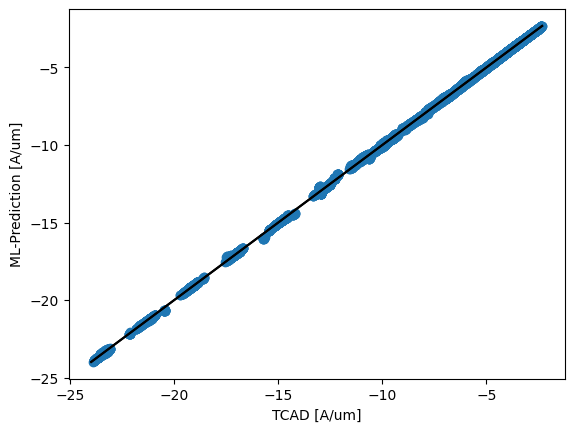

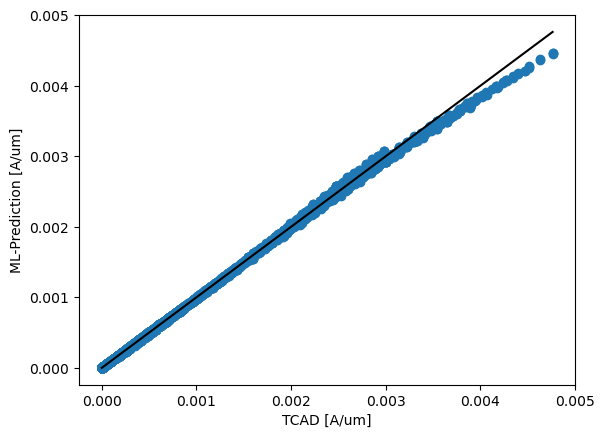

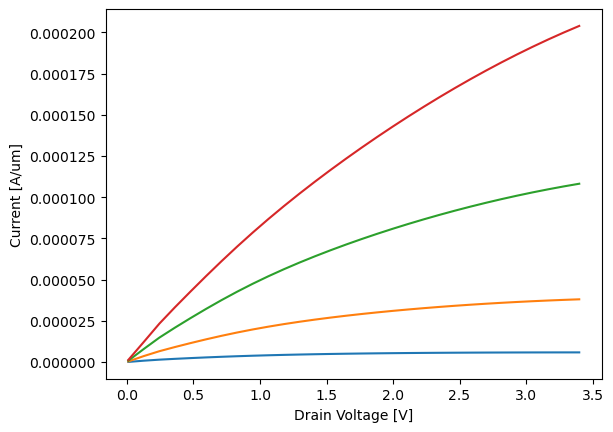

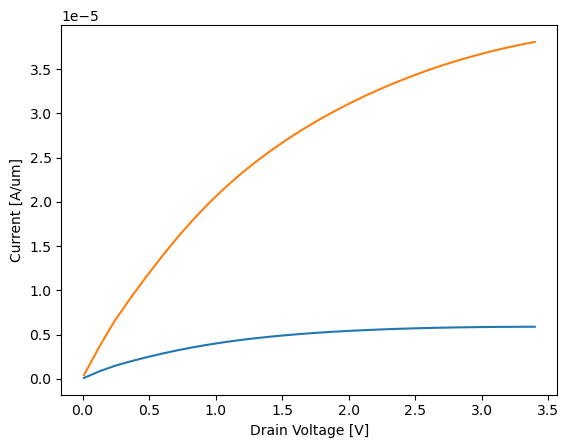

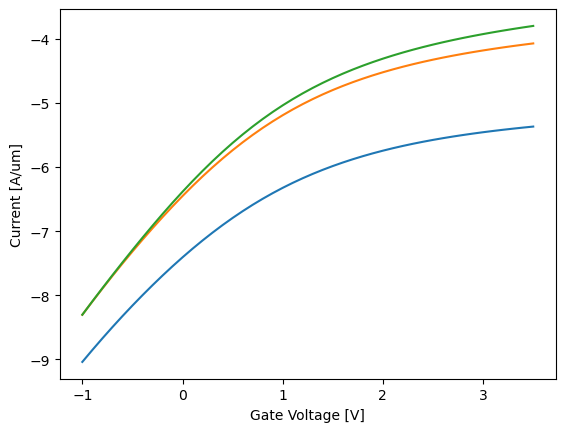

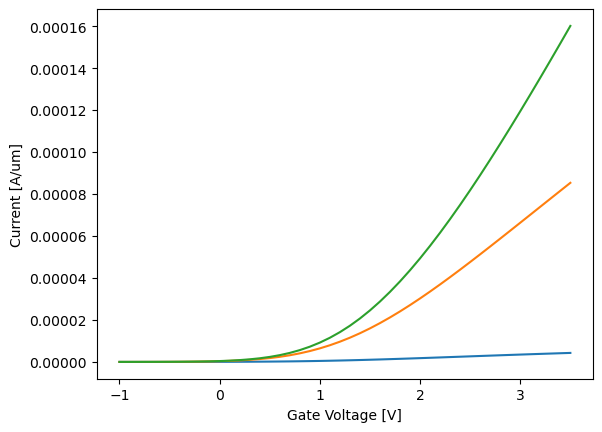

<All keys matched successfully>

In [11]:
#plt.plot(xloss[500:], MLoss[500:])
#plt.xlabel("Epoch")
#plt.ylabel("Loss")
#plt.show()

with torch.no_grad():

    output = []
    # Iterate over the dataloader for training data
    for i, data in enumerate(testdataloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0],1))

        #zero the gradients
        optimizer.zero_grad()

        #perform forward pass
        outputs = model(inputs)
        output.append(outputs)
# Process is complete.
print('Training process has finished.')

output1 = np.power(10, output/normIt+MinIt)
ytest1 = np.power(10, y_test/normIt+MinIt)
plt.scatter(np.log10(output1), np.log10(ytest1))
a = [min(ytest1), max(ytest1)]
b = [min(ytest1), max(ytest1)]
plt.plot(np.log10(a), np.log10(b), 'k')
plt.plot(np.log10(a), np.log10(b), 'k')

plt.xlabel("TCAD [A/um]")
plt.ylabel("ML-Prediction [A/um]")
plt.show()

plt.plot(a,b,'k')
plt.scatter(ytest1,output1)
plt.xlabel("TCAD [A/um]")
plt.ylabel("ML-Prediction [A/um]")
plt.show()


answer_test = [i for sublist in ytest1.tolist() for i in sublist]
#print(answer_test)
#print(output1)

######################### IDVD Vg=0.8 ##############################
x_test = np.linspace(0.01, 3.4, num=30)
#print(x_test)
# x_test = Logset(x_test.tolist())
X= []
# X =[[((x_test[i]/10)-MinV)*normV for i in list(range(len(x_test)))]]
for i in list(range(len(x_test))):
    temp=[(0.8-MinVg)*normVg, (x_test[i]-MinVd)*normVd, 0, (1000-Minstress_time)*normstress_time, (85 - Mintemperature) * normtemperature]
    X.append(temp)

Pred_y=[]
for i in list(range(len(x_test))):
    new_var =  torch.FloatTensor(X[i])
    pred_y=model(new_var).data.numpy()
    # Tolist=pred_y.tolist()
    Pred_y.append(pred_y)

I_pred =[np.power(10, i/normIt+MinIt) for i in Pred_y]

I_pred=np.array(I_pred)

I_final= []
for i in list(range(len(I_pred))):
    I_final.extend(I_pred[i])

######################### vg=1.7 IDVD ##############################

X1= []
# X =[[((x_test[i]/10)-MinV)*normV for i in list(range(len(x_test)))]]
for i in list(range(len(x_test))):
    temp=[(1.7-MinVg)*normVg, (x_test[i]-MinVd)*normVd, 0, (1000-Minstress_time)*normstress_time, (85 - Mintemperature) * normtemperature]
    X1.append(temp)

Pred_y1=[]
for i in list(range(len(x_test))):
    new_var =  torch.FloatTensor(X1[i])
    pred_y15=model(new_var).data.numpy()
    # Tolist=pred_y.tolist()
    Pred_y1.append(pred_y15)

I_pred1 =[np.power(10, i/normIt+MinIt) for i in Pred_y1]

I_pred1=np.array(I_pred1)

I_final1= []
for i in list(range(len(I_pred1))):
    I_final1.extend(I_pred1[i])

    ######################### vg=2.6 IDVD ##############################

X15= []
# X =[[((x_test[i]/10)-MinV)*normV for i in list(range(len(x_test)))]]
for i in list(range(len(x_test))):
    temp=[(2.6-MinVg)*normVg, (x_test[i]-MinVd)*normVd, 0, (1000-Minstress_time)*normstress_time, (85 - Mintemperature) * normtemperature]
    X15.append(temp)

Pred_y15=[]
for i in list(range(len(x_test))):
    new_var =  torch.FloatTensor(X15[i])
    pred_y15=model(new_var).data.numpy()
    # Tolist=pred_y.tolist()
    Pred_y15.append(pred_y15)

I_pred15 =[np.power(10, i/normIt+MinIt) for i in Pred_y15]

I_pred15=np.array(I_pred15)

I_final15= []
for i in list(range(len(I_pred15))):
    I_final15.extend(I_pred15[i])

############# Vg = 3.5 IDVD ######################

X25= []
# X =[[((x_test[i]/10)-MinV)*normV for i in list(range(len(x_test)))]]
for i in list(range(len(x_test))):
    temp=[(3.5-MinVg)*normVg, (x_test[i]-MinVd)*normVd, 0, (1000-Minstress_time)*normstress_time, (85 - Mintemperature) * normtemperature]
    X25.append(temp)

Pred_y25=[]
for i in list(range(len(x_test))):
    new_var =  torch.FloatTensor(X25[i])
    pred_y25=model(new_var).data.numpy()
    # Tolist=pred_y.tolist()
    Pred_y25.append(pred_y25)

I_pred25 =[np.power(10, i/normIt+MinIt) for i in Pred_y25]

I_pred25=np.array(I_pred25)

I_final25= []
for i in list(range(len(I_pred25))):
    I_final25.extend(I_pred25[i])

#
Vd_test = [0.01, 0.012, 0.015, 0.018, 0.022, 0.027, 0.034, 0.041, 0.050, 0.062, 0.075, 0.092, 0.113, 0.138, 0.169, 0.207, 0.253, 0.310, 0.379, 0.464, 0.568, 0.695, 0.851, 1.042, 1.275, 1.560, 1.9600, 2.337, 2.86, 3.4]

Id05_test =   [0.000002334528,	0.000002794075,	0.0000034787794,	0.0000041579335,	0.0000050547895,	0.0000061619935,	0.0000076860329,	0.0000091797256,	0.00001105585,	0.000013479929,	0.000016007828,	0.000019161787,	0.000022833255,	0.000026916777,	0.000031624447,	0.00003715309,	0.000043519255,	0.000051091182,	0.000059951515,	0.000070285433,	0.000081658741,	0.00009342872,	0.00010362595,	0.00011101203,	0.00011523482,	0.00011676641,	0.00011730475,	0.00011770665,	0.00011801129,	0.00011824027]
Id1_test = [0.0000068904883,	0.0000082636631,	0.000010320372,	0.000012373432,	0.000015105188,	0.000018510854,	0.000023262079,	0.000027993958,	0.000034049704,	0.000042075633,	0.000050709182,	0.000061905496,	0.000075594373,	0.000091696572,	0.0001113915,	0.0001351759,	0.00016354498,	0.00019827644,	0.00024007196,	0.00029160991,	0.00035507471,	0.00043267721,	0.00052608063,	0.00063305815,	0.0007463102,	0.0008524028,	0.00094690883,	0.0010169456,	0.0010548491,	0.0010714827]
Id15_test = [0.000010230849,	0.000012273384,	0.000015334923,	0.000018393846,	0.000022468346,	0.000027555048,	0.000034664693,	0.000041761002,	0.000050865865,	0.00006297397,	0.000076052026,	0.000093097636,	0.0001140765,	0.00013895091,	0.00016967963,	0.00020724046,	0.00025268947,	0.00030923446,	0.00037849644,	0.00046572552,	0.00057601516,	0.00071607664,	0.00089446014,	0.0011176712,	0.0013874073,	0.0016982907,	0.0020232064,	0.0023477774,	0.0026028589,	0.002758771]
Id_test =  [0.000012969341,	0.000015560565,	0.000019445809,	0.000023329203,	0.000028504135,	0.000034968453,	0.000044010611,	0.000053044062,	0.000064646594,	0.000080097706,	0.000096815121,	0.000118649,	0.00014559015,	0.00017764185,	0.00021740052,	0.0002662518,	0.00032573661,	0.0004003178,	0.00049245958,	0.00060963036,	0.00075939393,	0.00095209114,	0.0012021121,	0.0015230151,	0.0019258635,	0.0024179715,	0.0029806776,	0.003633391,	0.0042757708,	0.0047633642]

# x_test = np.power(10, x_test)

#plt.scatter(Vd_test, Id05_test) ## TCAD
#plt.scatter(Vd_test, Id1_test) ## TCAD
#plt.scatter(Vd_test, Id15_test) ## TCAD
#plt.scatter(Vd_test, Id_test) ## TCAD
plt.plot(x_test, I_final)
plt.plot(x_test, I_final1)
plt.plot(x_test, I_final15)
plt.plot(x_test, I_final25)
plt.xlabel("Drain Voltage [V]")
plt.ylabel("Current [A/um]")
plt.show()

#plt.scatter(Vd_test, Id05_test) ## TCAD
#plt.scatter(Vd_test, Id1_test) ## TCAD
plt.plot(x_test, I_final)
plt.plot(x_test, I_final1)
plt.xlabel("Drain Voltage [V]")
plt.ylabel("Current [A/um]")
plt.show()
#print(np.round(x_test, 3).tolist)
#print(I_final)
#print(I_final1)
#print(I_final15)
#print("")

#################### IDVG #######################

xv_test = list(range(-10, 36, 1))
xv_test = np.array(xv_test)/10

(normVgtest, xv_test_1, MinVtest)=normaliz(xv_test)
Xv= []
# X =[[((x_test[i]/10)-MinV)*normV for i in list(range(len(x_test)))]]
for i in list(range(len(xv_test_1))):
    temp=[(xv_test[i]-MinVg)*normVg, ((0.05)-MinVd)*normVd, 0, (1000-Minstress_time)*normstress_time, (85 - Mintemperature) * normtemperature]
    Xv.append(temp)

Predv_y=[]
for i in list(range(len(xv_test_1))):
    new_var =  torch.FloatTensor(Xv[i])
    pred_y=model(new_var).data.numpy()
    # Tolist=pred_y.tolist()
    Predv_y.append(pred_y)

Iv_pred =[np.power(10, i/normIt+MinIt) for i in Predv_y]

Iv_pred=np.array(Iv_pred)

Iv_final= []
for i in list(range(len(Iv_pred))):
    Iv_final.extend(Iv_pred[i])

#### VD =1.042V ####

Xv11=[]
for i in list(range(len(xv_test))):
    temp=[(xv_test[i]-MinVg)*normVg, ((1.042)-MinVd)*normVd, 0, (1000-Minstress_time)*normstress_time, (85 - Mintemperature) * normtemperature]
    Xv11.append(temp)

Predv_y11=[]
for i in list(range(len(xv_test))):
    new_var =  torch.FloatTensor(Xv11[i])
    pred_y11=model(new_var).data.numpy()
    Predv_y11.append(pred_y11)

Iv_pred11 =[np.power(10, i/normIt+MinIt) for i in Predv_y11]

Iv_pred11=np.array(Iv_pred11)

Iv_final11= []
for i in list(range(len(Iv_pred11))):
    Iv_final11.extend(Iv_pred11[i])

#### VD =3.4V #### 2.337

Xv25=[]
for i in list(range(len(xv_test))):
    temp=[(xv_test[i]-MinVg)*normVg, ((2.337)-MinVd)*normVd, 0, (1000-Minstress_time)*normstress_time, (85 - Mintemperature) * normtemperature]
    Xv25.append(temp)

Predv_y25=[]
for i in list(range(len(xv_test))):
    new_var =  torch.FloatTensor(Xv25[i])
    pred_y25=model(new_var).data.numpy()
    Predv_y25.append(pred_y25)

Iv_pred25 =[np.power(10, i/normIt+MinIt) for i in Predv_y25]

Iv_pred25=np.array(Iv_pred25)

Iv_final25= []
for i in list(range(len(Iv_pred25))):
    Iv_final25.extend(Iv_pred25[i])

##### below is from TCAD #####
Vg_test = list(idvg_temp.iloc[:, 0])
Id0_test = list(idvg_temp.iloc[:, 17]) #VD = 0.05V
Id_test = list(idvg_temp.iloc[:, 47]) #VD = 1.042V
Id2_test = list(idvg_temp.iloc[:, 115]) #VD = 3.4V

#plt.scatter(Vg_test, np.log10(Id0_test)) ## TCAD
#plt.scatter(Vg_test, np.log10(Id_test)) ## TCAD
#plt.scatter(Vg_test, np.log10(Id2_test)) ## TCAD
plt.plot(xv_test, np.log10(Iv_final))
plt.plot(xv_test, np.log10(Iv_final11))
plt.plot(xv_test, np.log10(Iv_final25))
plt.xlabel("Gate Voltage [V]")
plt.ylabel("Current [A/um]")
plt.show()

#plt.scatter(Vg_test, (Id0_test)) ## TCAD
#plt.scatter(Vg_test, (Id_test)) ## TCAD
#plt.scatter(Vg_test, (Id2_test)) ## TCAD
plt.plot(xv_test, (Iv_final))
plt.plot(xv_test, (Iv_final11))
plt.plot(xv_test, (Iv_final25))
plt.xlabel("Gate Voltage [V]")
plt.ylabel("Current [A/um]")
plt.show()

#print(xv_test)
#print(Iv_final)
#print(Iv_final11)
#print(Iv_final25)
#print("")

# Instantiate the PyTorch model
model.load_state_dict(torch.load('IWO_idvg_state_dict.pt'))


In [60]:
#### VD =3.4V #### 2.337
Xv34 = []
for i in range(len(xv_test)):
    temp = [(xv_test[i] - MinVg) * normVg, ((0.05) - MinVd) * normVd, 0, 0, 0]
    Xv34.append(temp)

Xv34_tensor = torch.FloatTensor(Xv34)
if torch.cuda.is_available():
    Xv34_tensor = Xv34_tensor.cuda()
    
Predv_y34 = []
with torch.no_grad():  # Disable gradient computation
    for i in range(len(Xv34_tensor)):
        new_var = Xv34_tensor[i].unsqueeze(0)  # Add the batch dimension
        pred_y34 = model(new_var)
        pred_y34 = pred_y34.cpu().numpy()  # Move to CPU for conversion to numpy
        Predv_y34.append(pred_y34)

Iv_pred34 = [np.power(10, i / normIt + MinIt) for i in Predv_y34]
Iv_pred34 = np.array(Iv_pred34).flatten()

Iv_final34= []
for i in list(range(len(Iv_pred34))):
    Iv_final34.append(Iv_pred34[i])
print(Iv_final34)

[5.2835422e-24, 5.3802747e-24, 5.474184e-24, 5.5652583e-24, 5.6533764e-24, 5.7385785e-24, 5.8208196e-24, 5.900092e-24, 5.976453e-24, 6.0498946e-24, 6.120502e-24, 6.1882628e-24, 6.253313e-24, 6.315634e-24, 6.3753553e-24, 6.4325615e-24, 6.4872884e-24, 6.5396088e-24, 6.5896585e-24, 6.637497e-24, 6.683216e-24, 6.726857e-24, 6.768553e-24, 6.808384e-24, 6.846405e-24, 6.882733e-24, 6.9174006e-24, 6.950503e-24, 6.982107e-24, 7.012284e-24, 7.041107e-24, 7.068652e-24, 7.094933e-24, 7.120061e-24, 7.144086e-24, 7.1670585e-24, 7.1890314e-24, 7.210026e-24, 7.23013e-24, 7.249367e-24, 7.267792e-24, 7.285433e-24, 7.302315e-24, 7.3185285e-24, 7.334069e-24, 7.348965e-24]


In [40]:
Vg_test = list(idvg_temp.iloc[:, 0])
Id0_test = list(idvg_temp.iloc[:, 17]) #VD = 0.05V
Id_test = list(idvg_temp.iloc[:, 47]) #VD = 1.042V
Id2_test = list(idvg_temp.iloc[:, 115]) #VD = 3.4V
print(len(Vg_test))
print(len(Id0_test))
print(Id_test)
print(Id2_test)

36
36
[6.57e-23, 1.07e-21, 1.51e-19, 2.09e-17, 2.85e-15, 3.46e-13, 2.15e-11, 4.74e-10, 7.61e-09, 1.22e-07, 1.33e-06, 6.88e-06, 2.32e-05, 5.78e-05, 0.000111012, 0.000176628, 0.000247742, 0.000320924, 0.000396194, 0.000474189, 0.000554848, 0.000633058, 0.00070886, 0.000782244, 0.000853249, 0.000922179, 0.000989084, 0.001054211, 0.001117671, 0.001179566, 0.001240048, 0.0012992, 0.001357003, 0.00141354, 0.00146889, 0.001523015]
[2.46e-11, 1.26e-11, 5.06e-12, 1.35e-12, 2.05e-13, 3.45e-13, 2.1e-11, 4.74e-10, 7.62e-09, 1.22e-07, 1.33e-06, 6.84e-06, 2.32e-05, 5.86e-05, 0.000116263, 0.000194625, 0.000291367, 0.000404218, 0.000531856, 0.000672876, 0.00082542, 0.000987804, 0.001158278, 0.001335134, 0.001517142, 0.001704538, 0.001898925, 0.002090644, 0.002282532, 0.002472623, 0.002659717, 0.002843596, 0.003024183, 0.003201438, 0.003375355, 0.003546031]


In [48]:
It = []
for t in list(range(len(temperature))):
    for s in list(range(len(stress_time))):
        for l in list(range(len(lch))):
            for i in list(range(len(vd))):
                col_index = col_index = 2*i + 1 + 2*len(vd)*l + 2*len(vd)*len(lch)*s + 2*len(vd)*len(lch)*len(stress_time)*t
                temp = idvg_temp.iloc[:, col_index]
                temp = np.array(temp.values)
                It.extend(temp)

It_prev = []
for l in list(range(len(lch))):
    for i in list(range(len(vd))):
        temp = idvg_temp.iloc[:, 2*i+1+2*len(vd)*l]
        temp = np.array(temp.values)
        It_prev.extend(temp)

def test(It):
    # Convert It to a NumPy array for element-wise comparison
    It_array = np.array(It)
    
    # Find indices of non-positive values
    non_positive_indices = np.where(It_array <= 0)[0]
    non_positive_values = It_array[It_array <= 0]
    
    print("Indices of non-positive values:", non_positive_indices)
    print("Non-positive values:", non_positive_values)
    print(len(non_positive_values))
    print(len(It))

test(It)
test(It_prev)

It = Logset(It)

Indices of non-positive values: []
Non-positive values: []
0
172800
Indices of non-positive values: []
Non-positive values: []
0
8640


In [3]:
import os
cpu_count = os.cpu_count()
print(cpu_count)

24
